In [20]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop("Outcome", axis = 1)
y = diabetes_df["Outcome"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
# Decision Tree Classification
# deep and complex trees tend to overfit, so we want to generalize and have reasonable simple trees
model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 5, random_state = 42)

In [84]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75       151
           1       0.56      0.78      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.73      0.70       231
weighted avg       0.75      0.71      0.72       231



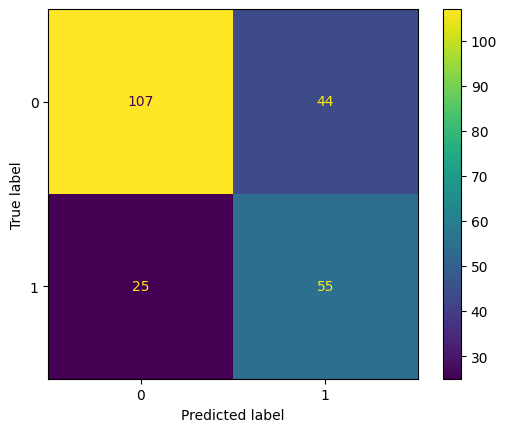

In [25]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [26]:
# Recall: tp / (tp + tn)
48 / (48 + 32)

0.6

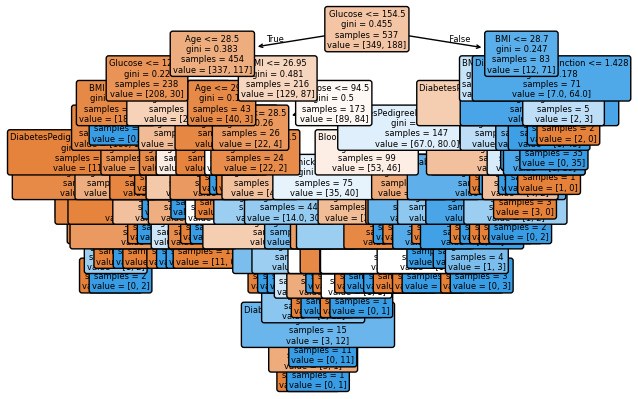

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns), filled = True, fontsize = 6, rounded = True)
plt.show()
plt.savefig("tree.svg")

In [106]:
def name_change(dictionary):
    list = []
    for v in dictionary:
        list.append(v.values())
    i = 0
    names = ""
    while i < len(list) - 2:
        names += str(list[i]) + ", "
        i += 1
    names += str(list[len(list) - 2]) + " & " + str(list[len(list) - 1])
    return names
name_change([{'name': 'Niles'}, {'name': 'C.C'}, {'name': 'Fran'}])

"dict_values(['Niles']), dict_values(['C.C']) & dict_values(['Fran'])"